# Incidence of chickenpox in France

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

The data on the incidence of chickenpox are available from the Web site of the [Réseau Sentinelles](http://www.sentiweb.fr/). We download them as a file in CSV format, in which each line corresponds to a week in the observation period. Only the complete dataset, starting in 1991 and ending with a recent week, is available for download.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
data_file = "incidence-PAY-7.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In order to make the data used in the analysis available and avoid possible problems in their accessibility, dataset has been downloaded by the [main site](https://www.sentiweb.fr/datasets/incidence-PAY-3.csv) (stored into the variable `data_url`) and copied in a local file associated with this [url](https://app-learninglab.inria.fr/moocrr/gitlab/59f64515f1441eb96cdb77ebbe26d68e/mooc-rr/blob/master/module3/exo2/incidence-PAY-7.csv) (stored into the variable `data_file`). In case the local file is not present, then it is downloaded from the relative url.

This is the documentation of the data from [the download site](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Column name  | Description                                                                                                               |
|--------------|---------------------------------------------------------------------------------------------------------------------------|
| `week`       | ISO8601 Yearweek number as numeric (year times 100 + week nubmer)                                                               |
| `indicator`  | Unique identifier of the indicator, see metadata document https://www.sentiweb.fr/meta.json                               |
| `inc`        | Estimated incidence value for the time step, in the geographic level                                                      |
| `inc_low`    | Lower bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc_up`     | Upper bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc100`     | Estimated rate incidence per 100,000 inhabitants                                                                          |
| `inc100_low` | Lower bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc100_up`  | Upper bound of the estimated rate incidence 95% Confidence Interval                                                       |
| `geo_insee`  | Identifier of the geographic area, from INSEE https://www.insee.fr                                                        |
| `geo_name`   | Geographic label of the area, corresponding to INSEE code. This label is not an id and is only provided for human reading |

The first line of the CSV file is a comment, which we ignore with `skip=1`.

In [4]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202034          7   2507      259    4755       4           1   
1     202033          7   1320      177    2463       2           0   
2     202032          7   2650      689    4611       4           1   
3     202031          7   1303      100    2506       2           0   
4     202030          7   1385       75    2695       2           0   
5     202029          7    841       10    1672       1           0   
6     202028          7    728        0    1515       1           0   
7     202027          7    986      149    1823       1           0   
8     202026          7    694        0    1454       1           0   
9     202025          7    228        0     597       0           0   
10    202024          7    388        0     959       1           0   
11    202023          7    558        1    1115       1           0   
12    202022          7    277        0     633       0           0   
13    202021          7    602       36    1168       1           0   
14    202020          7    824       20    1628       1           0   
15    202019          7    310        0     753       0           0   
16    202018          7    849       98    1600       1           0   
17    202017          7    272        0     658       0           0   
18    202016          7    758       78    1438       1           0   
19    202015          7   1918      675    3161       3           1   
20    202014          7   3879     2227    5531       6           3   
21    202013          7   7326     5236    9416      11           8   
22    202012          7   8123     5790   10456      12           8   
23    202011          7  10198     7568   12828      15          11   
24    202010          7   9011     6691   11331      14          10   
25    202009          7  13631    10544   16718      21          16   
26    202008          7  10424     7708   13140      16          12   
27    202007          7   8959     6574   11344      14          10   
28    202006          7   9264     6925   11603      14          10   
29    202005          7   8505     6314   10696      13          10   
...      ...        ...    ...      ...     ...     ...         ...   
1521  199126          7  17608    11304   23912      31          20   
1522  199125          7  16169    10700   21638      28          18   
1523  199124          7  16171    10071   22271      28          17   
1524  199123          7  11947     7671   16223      21          13   
1525  199122          7  15452     9953   20951      27          17   
1526  199121          7  14903     8975   20831      26          16   
1527  199120          7  19053    12742   25364      34          23   
1528  199119          7  16739    11246   22232      29          19   
1529  199118          7  21385    13882   28888      38          25   
1530  199117          7  13462     8877   18047      24          16   
1531  199116          7  14857    10068   19646      26          18   
1532  199115          7  13975     9781   18169      25          18   
1533  199114          7  12265     7684   16846      22          14   
1534  199113          7   9567     6041   13093      17          11   
1535  199112          7  10864     7331   14397      19          13   
1536  199111          7  15574    11184   19964      27          19   
1537  199110          7  16643    11372   21914      29          20   
1538  199109          7  13741     8780   18702      24          15   
1539  199108          7  13289     8813   17765      23          15   
1540  199107          7  12337     8077   16597      22          15   
1541  199106          7  10877     7013   14741      19          12   
1542  199105          7  10442     6544   14340      18          11   
1543  199104          7   7913     4563   11263      14           8   
1544  199103          7  15387    10484   20290      27          18   
1545  199102          7  16277  

Are there missing data points? No.

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

We delete this point, which does not have big consequence for our rather simple analysis.

In [6]:
data = raw_data.copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202034          7   2507      259    4755       4           1   
1     202033          7   1320      177    2463       2           0   
2     202032          7   2650      689    4611       4           1   
3     202031          7   1303      100    2506       2           0   
4     202030          7   1385       75    2695       2           0   
5     202029          7    841       10    1672       1           0   
6     202028          7    728        0    1515       1           0   
7     202027          7    986      149    1823       1           0   
8     202026          7    694        0    1454       1           0   
9     202025          7    228        0     597       0           0   
10    202024          7    388        0     959       1           0   
11    202023          7    558        1    1115       1           0   
12    202022          7    277        0     633       0           0   
13    202021          7    602       36    1168       1           0   
14    202020          7    824       20    1628       1           0   
15    202019          7    310        0     753       0           0   
16    202018          7    849       98    1600       1           0   
17    202017          7    272        0     658       0           0   
18    202016          7    758       78    1438       1           0   
19    202015          7   1918      675    3161       3           1   
20    202014          7   3879     2227    5531       6           3   
21    202013          7   7326     5236    9416      11           8   
22    202012          7   8123     5790   10456      12           8   
23    202011          7  10198     7568   12828      15          11   
24    202010          7   9011     6691   11331      14          10   
25    202009          7  13631    10544   16718      21          16   
26    202008          7  10424     7708   13140      16          12   
27    202007          7   8959     6574   11344      14          10   
28    202006          7   9264     6925   11603      14          10   
29    202005          7   8505     6314   10696      13          10   
...      ...        ...    ...      ...     ...     ...         ...   
1521  199126          7  17608    11304   23912      31          20   
1522  199125          7  16169    10700   21638      28          18   
1523  199124          7  16171    10071   22271      28          17   
1524  199123          7  11947     7671   16223      21          13   
1525  199122          7  15452     9953   20951      27          17   
1526  199121          7  14903     8975   20831      26          16   
1527  199120          7  19053    12742   25364      34          23   
1528  199119          7  16739    11246   22232      29          19   
1529  199118          7  21385    13882   28888      38          25   
1530  199117          7  13462     8877   18047      24          16   
1531  199116          7  14857    10068   19646      26          18   
1532  199115          7  13975     9781   18169      25          18   
1533  199114          7  12265     7684   16846      22          14   
1534  199113          7   9567     6041   13093      17          11   
1535  199112          7  10864     7331   14397      19          13   
1536  199111          7  15574    11184   19964      27          19   
1537  199110          7  16643    11372   21914      29          20   
1538  199109          7  13741     8780   18702      24          15   
1539  199108          7  13289     8813   17765      23          15   
1540  199107          7  12337     8077   16597      22          15   
1541  199106          7  10877     7013   14741      19          12   
1542  199105          7  10442     6544   14340      18          11   
1543  199104          7   7913     4563   11263      14           8   
1544  199103          7  15387    10484   20290      27          18   
1545  199102          7  16277  

Our dataset uses an uncommon encoding; the week number is attached
to the year number, leaving the impression of a six-digit integer.
That is how Pandas interprets it.

A second problem is that Pandas does not know about week numbers.
It needs to be given the dates of the beginning and end of the week.
We use the library `isoweek` for that.

Since the conversion is a bit lengthy, we write a small Python 
function for doing it. Then we apply it to all points in our dataset. 
The results go into a new column 'period'.

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

There are two more small changes to make.

First, we define the observation periods as the new index of
our dataset. That turns it into a time series, which will be
convenient later on.

Second, we sort the points chronologically.

In [8]:
sorted_data = data.set_index('period').sort_index()

We check the consistency of the data. Between the end of a period and
the beginning of the next one, the difference should be zero, or very small.
We tolerate an error of one second.

This is OK except for one pair of consecutive periods between which
a whole week is missing.

We recognize the dates: it's the week without observations that we
have deleted earlier!

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

A first look at the data!

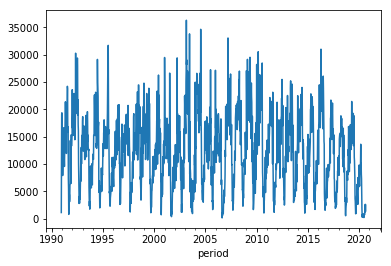

In [10]:
sorted_data['inc'].plot()

A zoom on the last few years shows more clearly the annual trend.

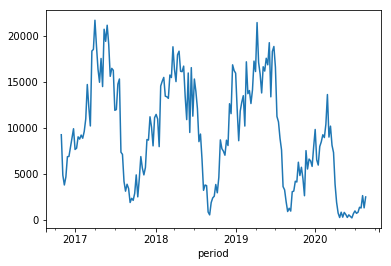

In [11]:
sorted_data['inc'][-200:].plot()

## Study of the annual incidence

Since the peaks of the epidemic do not happen in autumn, near the transition
between calendar years, we define the reference period for the annual
incidence from September 1st of year $N$ to September 1st of year $N+1$. We
label this period as year $N+1$ because the peak is always located in
year $N+1$. The very low incidence in summer ensures that the arbitrariness
of the choice of reference period has no impact on our conclusions.

Our task is a bit complicated by the fact that a year does not have an
integer number of weeks. Therefore we modify our reference period a bit:
instead of September 1st, we use the first day of the week containing September 1st.

A final detail: the dataset starts in December 1990, the first peak is thus
incomplete, We start the analysis with the first full peak.

In [12]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

Starting from this list of weeks that contain August 1st, we obtain intervals of approximately one year as the periods between two adjacent weeks in this list. We compute the sums of weekly incidences for all these periods.

We also check that our periods contain between 51 and 52 weeks, as a safeguard against potential mistakes in our code.

In [13]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

And here are the annual incidences.

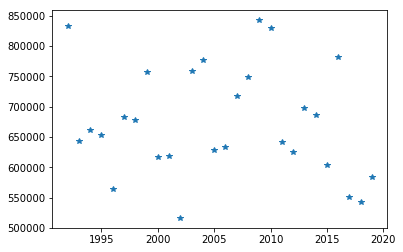

In [14]:
yearly_incidence.plot(style='*')

A sorted list makes it easier to find the highest values (at the end).

In [15]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Finally, a histogram clearly shows the few very strong epidemics, which affect about 10% of the French population,
but are rare: there were three of them in the course of 30 years. The typical epidemic affects only half as many people.

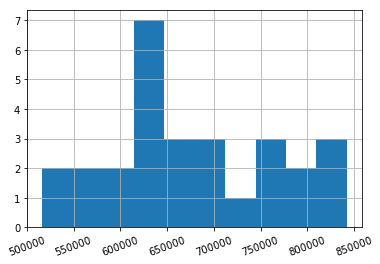

In [16]:
yearly_incidence.hist(xrot=20)